In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  
warnings.filterwarnings('ignore')

In [13]:
def smoothing(data):
    series = data
    # Tail-rolling average transform
    rolling = series.rolling(window=6)
    rolling_mean = rolling.mean()
    return rolling_mean

def subSample(data):
    data['Display Time'] = pd.to_datetime(data['Display Time'])
    data['time_gap'] = data['Display Time'].shift(1)-data['Display Time'][0]
    data['time_gap'][0] = '00:00:00'
    mods = [0,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899]
    subset = pd.DataFrame()
    for i in range(1,len(data.index)):
        seconds = data['time_gap'][i].total_seconds()
        if (seconds%900) in mods:
            subj_id = data['subjectId'][i]
            gv = data['GlucoseValue'][i]
            dt = data['Display Time'][i]
            temp_df = pd.DataFrame({'Display Time':[dt], 'GlucoseValue':[gv], 'subjectId':[subj_id]})
            subset = pd.concat([temp_df,subset],ignore_index=True)
    subset = subset.iloc[::-1]
    subset = subset.reset_index(drop=True)
    data.drop(['time_gap'], axis=1, inplace=True)
    return subset

def convertUnits(data, unit):
    if unit == 'mmol':
        if(data['GlucoseValue'][0]>18):
            in_mmols = pd.DataFrame({'Display Time':data['Display Time'], 'GlucoseValue':data['GlucoseValue']/18, 'subjectId':data['subjectId']})
            return in_mmols
        else:
            print("Data already in mmols")
            return data
    elif unit == 'mg':
        if(data['GlucoseValue'][0]<18):
            in_mgs = pd.DataFrame({'Display Time':data['Display Time'], 'GlucoseValue':data['GlucoseValue']*18, 'subjectId':data['subjectId']})
            return in_mgs
        else:
            print("Data already in mgs")
            return data
    else:
        print("Invalid unit. Please enter 'mmol' or 'mg'. ")
        
        
def full_days(data):
    dates = list()
    for i in range(0,len(data.index)):
        dates.append(data['Display Time'][i].date())
    data['Dates'] = dates
    end = df['Dates'].iloc[-1]
    start = df['Dates'].iloc[0]

    indexVals = data[ data['Dates'] == start ].index
    # indexVals
    data.drop(indexVals , inplace=True)

    indexVals = data[ data['Dates'] == end ].index
    # indexVals
    data.drop(indexVals , inplace=True)

    data = data.reset_index(drop=True)
    
    data.drop(['Dates'], axis=1, inplace=True)
    
    return data

    

In [14]:
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/Hall/data_hall_raw.csv")
# data['Display Time'] = pd.to_datetime(data['Display Time'])
df = data[data['subjectId']=='1636-69-032']
df=df.reset_index(drop=True)
print(df.dtypes)
display(df)

Display Time    object
GlucoseValue     int64
subjectId       object
dtype: object


,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,122,1636-69-032
1,2016-01-13 13:03:17,123,1636-69-032
2,2016-01-13 13:08:17,124,1636-69-032
3,2016-01-13 13:13:17,128,1636-69-032
4,2016-01-13 13:18:17,133,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,101,1636-69-032
1779,2016-01-19 17:17:49,98,1636-69-032
1780,2016-01-19 17:22:49,101,1636-69-032
1781,2016-01-19 17:27:49,106,1636-69-032


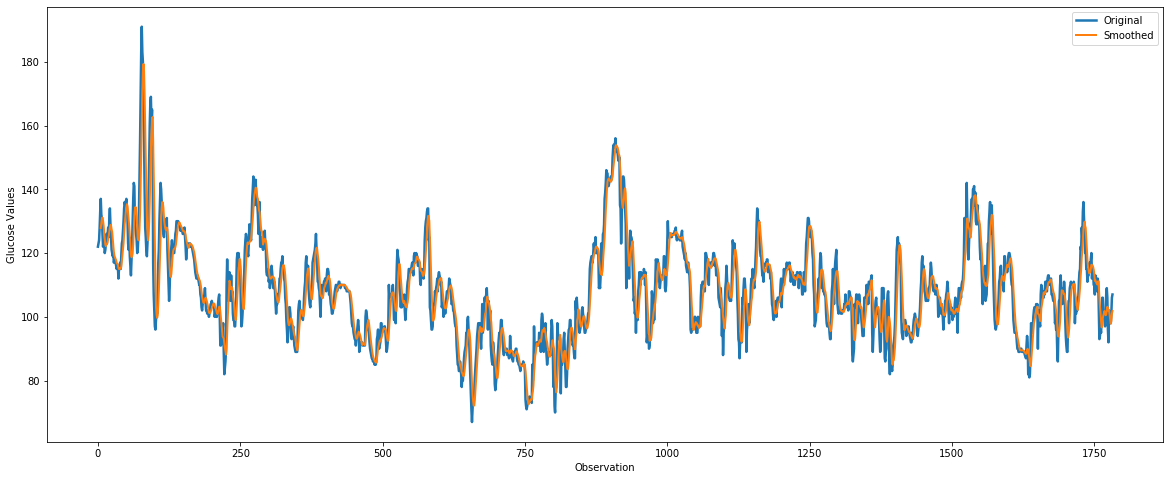

In [15]:
smoothened = smoothing(df)

plt.figure(figsize=(20, 8))

plt.plot(df['GlucoseValue'].tolist(), label='Original', linewidth=2.5)
plt.plot(smoothened['GlucoseValue'].tolist(), label='Smoothed', linewidth=2)
plt.xlabel('Observation')
plt.ylabel('Glucose Values')
plt.legend()

In [16]:
# df

In [17]:
subsample = subSample(df)
subsample

,Display Time,GlucoseValue,subjectId
0,2016-01-13 13:03:17,123,1636-69-032
1,2016-01-13 13:18:17,133,1636-69-032
2,2016-01-13 13:33:17,131,1636-69-032
3,2016-01-13 13:48:17,124,1636-69-032
4,2016-01-13 14:03:17,121,1636-69-032
...,...,...,...
590,2016-01-19 16:32:49,101,1636-69-032
591,2016-01-19 16:47:49,106,1636-69-032
592,2016-01-19 17:02:49,102,1636-69-032
593,2016-01-19 17:17:49,98,1636-69-032


In [18]:
# df

In [19]:
#by default, the data is in mg
in_mmols = convertUnits(df, 'mmol')
in_mmols


,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,6.777778,1636-69-032
1,2016-01-13 13:03:17,6.833333,1636-69-032
2,2016-01-13 13:08:17,6.888889,1636-69-032
3,2016-01-13 13:13:17,7.111111,1636-69-032
4,2016-01-13 13:18:17,7.388889,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,5.611111,1636-69-032
1779,2016-01-19 17:17:49,5.444444,1636-69-032
1780,2016-01-19 17:22:49,5.611111,1636-69-032
1781,2016-01-19 17:27:49,5.888889,1636-69-032


In [20]:
in_mgs = convertUnits(in_mmols, 'mg')
in_mgs

,Display Time,GlucoseValue,subjectId
0,2016-01-13 12:58:17,122.0,1636-69-032
1,2016-01-13 13:03:17,123.0,1636-69-032
2,2016-01-13 13:08:17,124.0,1636-69-032
3,2016-01-13 13:13:17,128.0,1636-69-032
4,2016-01-13 13:18:17,133.0,1636-69-032
...,...,...,...
1778,2016-01-19 17:12:49,101.0,1636-69-032
1779,2016-01-19 17:17:49,98.0,1636-69-032
1780,2016-01-19 17:22:49,101.0,1636-69-032
1781,2016-01-19 17:27:49,106.0,1636-69-032


In [21]:
# df

In [22]:
df_fullDay = full_days(df)
df_fullDay

,Display Time,GlucoseValue,subjectId
0,2016-01-14 00:03:15,120,1636-69-032
1,2016-01-14 00:08:15,120,1636-69-032
2,2016-01-14 00:13:15,123,1636-69-032
3,2016-01-14 00:18:15,126,1636-69-032
4,2016-01-14 00:23:15,127,1636-69-032
...,...,...,...
1434,2016-01-18 23:37:52,136,1636-69-032
1435,2016-01-18 23:42:52,126,1636-69-032
1436,2016-01-18 23:47:52,132,1636-69-032
1437,2016-01-18 23:52:52,135,1636-69-032


In [25]:
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/CGM/CGM_Analyzer_Appended.csv")
# data['Display Time'] = pd.to_datetime(data['Display Time'])
df = data[data['subjectId']=='ID02']
df=df.reset_index(drop=True)
print(df.dtypes)
display(df)

Display Time     object
subjectId        object
GlucoseValue    float64
dtype: object


,Display Time,subjectId,GlucoseValue
0,2016-05-26 07:50:00,ID02,84.600000
1,2016-05-26 07:53:00,ID02,84.681432
2,2016-05-26 07:56:00,ID02,84.642660
3,2016-05-26 07:59:00,ID02,84.259764
4,2016-05-26 08:02:00,ID02,84.207834
...,...,...,...
3011,2016-06-01 14:23:00,ID02,26.261156
3012,2016-06-01 14:26:00,ID02,26.364787
3013,2016-06-01 14:29:00,ID02,26.463650
3014,2016-06-01 14:32:00,ID02,26.690792


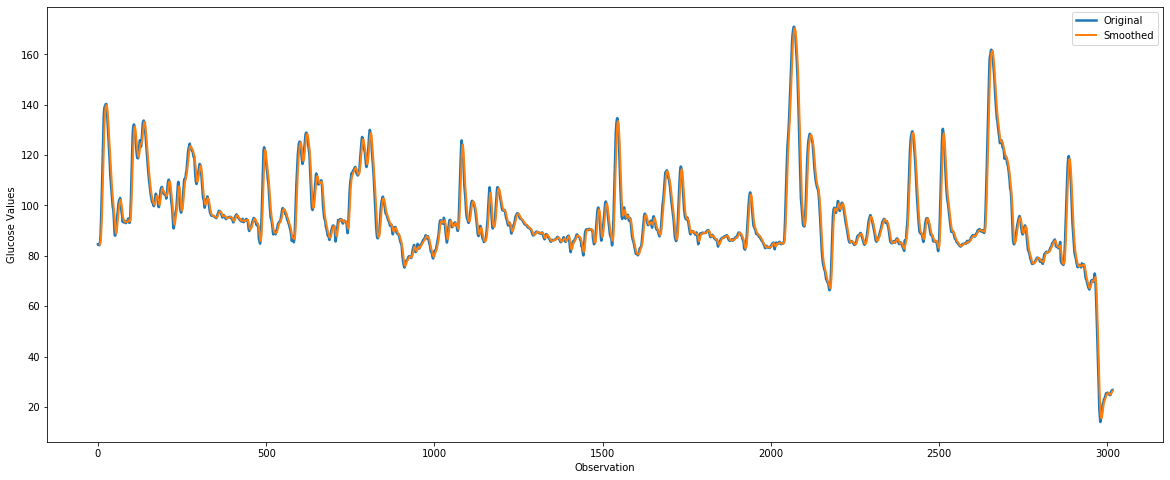

In [28]:
smoothened = smoothing(df)

plt.figure(figsize=(20, 8))

plt.plot(df['GlucoseValue'].tolist(), label='Original', linewidth=2.5)
plt.plot(smoothened['GlucoseValue'].tolist(), label='Smoothed', linewidth=2)
plt.xlabel('Observation')
plt.ylabel('Glucose Values')
plt.legend()

In [29]:
subsample = subSample(df)
subsample

,Display Time,GlucoseValue,subjectId
0,2016-05-26 07:53:00,84.681432,ID02
1,2016-05-26 08:08:00,85.100785,ID02
2,2016-05-26 08:23:00,101.980067,ID02
3,2016-05-26 08:38:00,129.435642,ID02
4,2016-05-26 08:53:00,139.464900,ID02
...,...,...,...
598,2016-06-01 13:23:00,23.332165,ID02
599,2016-06-01 13:38:00,25.358056,ID02
600,2016-06-01 13:53:00,25.667361,ID02
601,2016-06-01 14:08:00,24.837160,ID02


In [30]:
#by default, the data is in mg
in_mmols = convertUnits(df, 'mmol')
in_mmols

,Display Time,GlucoseValue,subjectId
0,2016-05-26 07:50:00,4.700000,ID02
1,2016-05-26 07:53:00,4.704524,ID02
2,2016-05-26 07:56:00,4.702370,ID02
3,2016-05-26 07:59:00,4.681098,ID02
4,2016-05-26 08:02:00,4.678213,ID02
...,...,...,...
3011,2016-06-01 14:23:00,1.458953,ID02
3012,2016-06-01 14:26:00,1.464710,ID02
3013,2016-06-01 14:29:00,1.470203,ID02
3014,2016-06-01 14:32:00,1.482822,ID02


In [31]:
in_mgs = convertUnits(in_mmols, 'mg')
in_mgs

,Display Time,GlucoseValue,subjectId
0,2016-05-26 07:50:00,84.600000,ID02
1,2016-05-26 07:53:00,84.681432,ID02
2,2016-05-26 07:56:00,84.642660,ID02
3,2016-05-26 07:59:00,84.259764,ID02
4,2016-05-26 08:02:00,84.207834,ID02
...,...,...,...
3011,2016-06-01 14:23:00,26.261156,ID02
3012,2016-06-01 14:26:00,26.364787,ID02
3013,2016-06-01 14:29:00,26.463650,ID02
3014,2016-06-01 14:32:00,26.690792,ID02


In [32]:
df_fullDay = full_days(df)
df_fullDay

,Display Time,subjectId,GlucoseValue
0,2016-05-27 00:02:00,ID02,102.708936
1,2016-05-27 00:05:00,ID02,103.565831
2,2016-05-27 00:08:00,ID02,103.445100
3,2016-05-27 00:11:00,ID02,102.818891
4,2016-05-27 00:14:00,ID02,101.991096
...,...,...,...
2395,2016-05-31 23:47:00,ID02,87.266250
2396,2016-05-31 23:50:00,ID02,85.842670
2397,2016-05-31 23:53:00,ID02,85.019915
2398,2016-05-31 23:56:00,ID02,84.587076
